<a href="https://colab.research.google.com/github/DevBatra05/AIML_Sem_4/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
from google.colab import files
ss=files.upload()

Saving employee_data.csv to employee_data (2).csv


In [13]:
# -------------------- Load the Dataset --------------------
# Assuming the dataset is in a CSV file named 'employee_data.csv'
data = pd.read_csv('employee_data.csv')

In [14]:
# Assuming the target column is 'Salary'
target = data['Salary']

In [15]:
# -------------------- Data Cleaning --------------------
# Check for missing values
missing_percent = data.isnull().mean() * 100

No missing values detected.


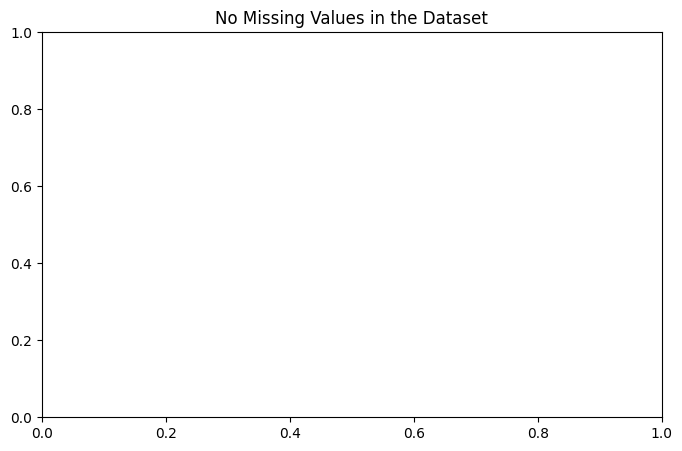

In [16]:
plt.figure(figsize=(8, 5))
if missing_percent.sum() > 0:
    print("Missing values found, plotting missing values...")
    sns.barplot(x=missing_percent[missing_percent > 0].index,
                y=missing_percent[missing_percent > 0].values,
                palette='Blues_d')
    plt.title('Percentage of Missing Values by Feature')
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Impute missing values
    data.fillna(data.median(), inplace=True)
    print("Missing values imputed.")
else:
    print("No missing values detected.")
    plt.title('No Missing Values in the Dataset')
    plt.show()

In [18]:
# Check for duplicate rows and remove them
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows. Removing duplicates.")
    data.drop_duplicates(inplace=True)

print(f"Data shape after cleaning: {data.shape}")

Data shape after cleaning: (20, 5)


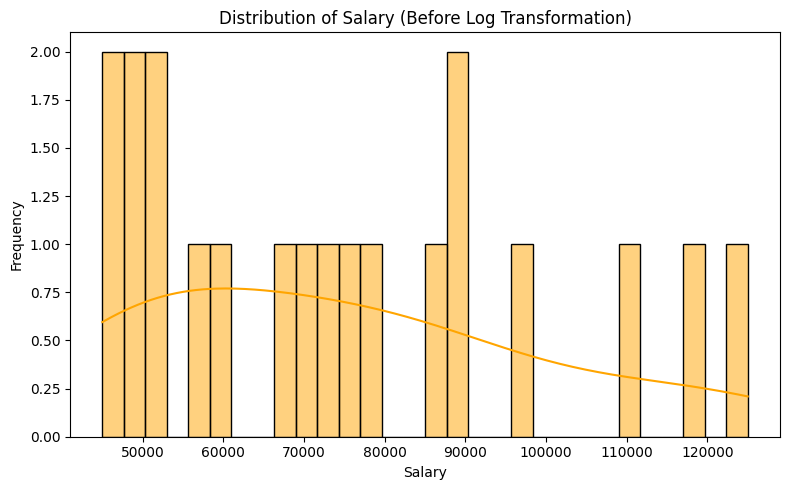

In [19]:
# -------------------- Data Transformation --------------------
# Visualize the target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Salary'], kde=True, bins=30, color='orange')
plt.title('Distribution of Salary (Before Log Transformation)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
# Log-transform the target variable to normalize its distribution
data['Salary'] = np.log1p(data['Salary'])

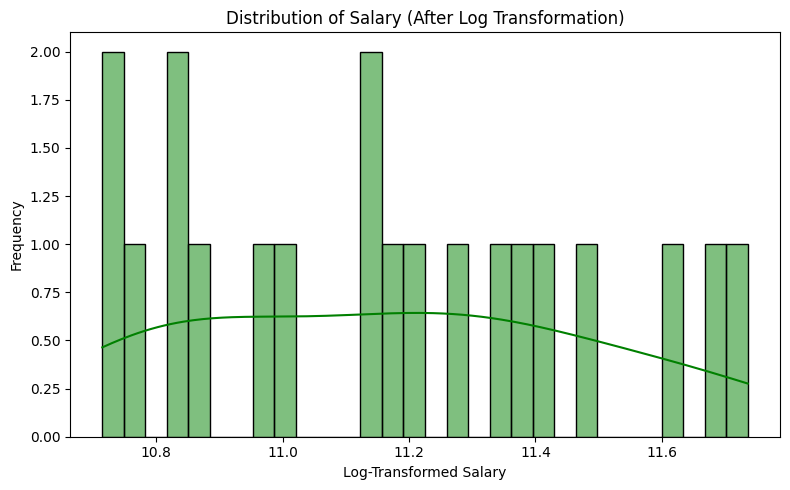

In [21]:
# Visualize the transformed target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Salary'], kde=True, bins=30, color='green')
plt.title('Distribution of Salary (After Log Transformation)')
plt.xlabel('Log-Transformed Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [22]:
# Standardize numerical features
numeric_features = data.select_dtypes(include=[np.number]).drop(columns=['Salary'])
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

# Combine scaled features with the target
data = pd.concat([scaled_features, data['Salary']], axis=1)

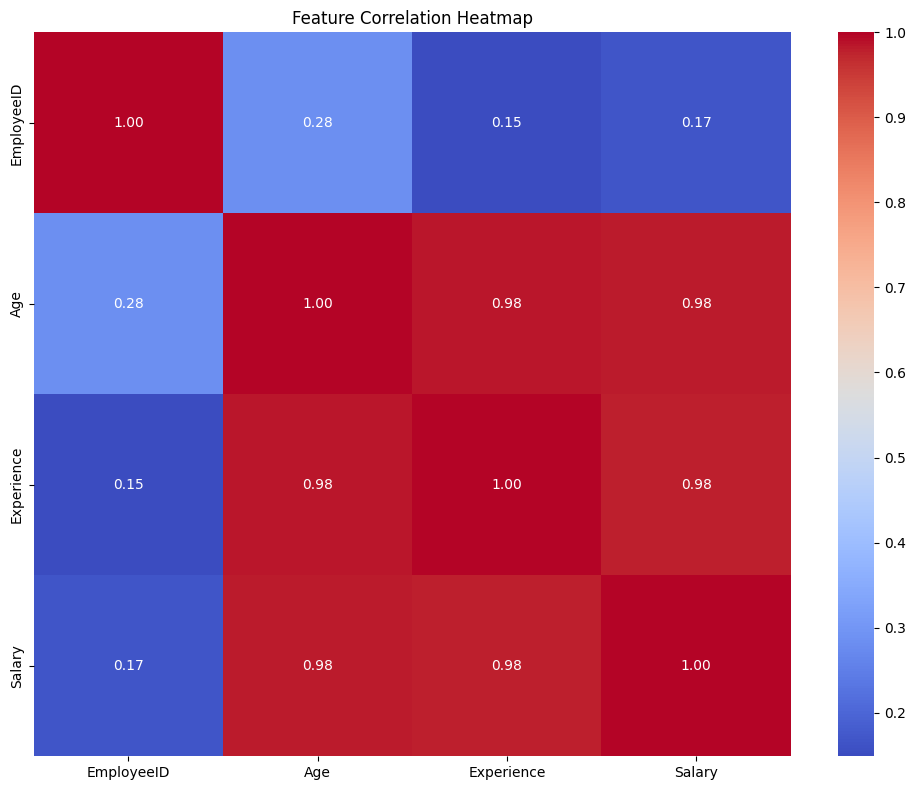

In [23]:
# -------------------- Feature Correlation --------------------
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [24]:
# -------------------- Data Reduction --------------------
# Variance thresholding to remove low-variance features
selector = VarianceThreshold(threshold=0.01)
features = data.drop(columns=['Salary'])  # Exclude target column
reduced_features = selector.fit_transform(features)
selected_columns = features.columns[selector.get_support(indices=True)]

In [25]:
# Update the data with reduced features
data = pd.DataFrame(reduced_features, columns=selected_columns)
data['Salary'] = target  # Re-attach the target column

print(f"Number of features after variance thresholding: {data.shape[1] - 1}")

Number of features after variance thresholding: 3


<ipython-input-26-989c5db58076>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features.columns, y=variances, palette='Blues_d')


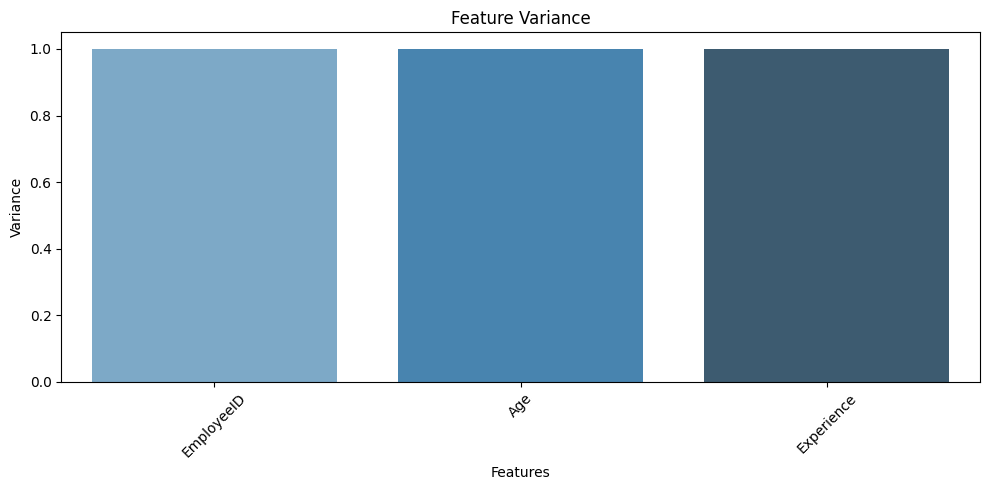

In [26]:
# Visualize feature variances
variances = selector.variances_
plt.figure(figsize=(10, 5))
sns.barplot(x=features.columns, y=variances, palette='Blues_d')
plt.title('Feature Variance')
plt.ylabel('Variance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# -------------------- Data Splitting --------------------
# Split into features (X) and target (y)
X = data.drop(columns=['Salary'])
y = data['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Output Summary --------------------
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (16, 3)
Testing features shape: (4, 3)
